In [16]:
from face_recognition import face_locations
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

import pandas as pd

## 1. Trying out face_recognition package

In [17]:
run_test = False

if run_test == True:
    # Download the image from the web
    urls = [
        'https://static.posters.cz/image/750/plakater/spring-forrest-i101995.jpg',
        'https://images.pexels.com/photos/1035671/pexels-photo-1035671.jpeg?cs=srgb&dl=pexels-anastasiya-lobanovskaya-1035671.jpg&fm=jpg'
        ]

    for i, url in enumerate(urls):
        print(f"Prediction {i}")
        response = requests.get(url)

        # Open the image using Pillow
        img = Image.open(BytesIO(response.content))

        # Convert the image to a numpy array
        img_array = np.asarray(img)

        # Find all the faces in the image
        print("prediction:", face_locations(img_array))

        # Show the image
        plt.imshow(img_array)
        plt.show()

        print()



## 2. Data exploring

In [18]:
# Read in all files from the dataset as dataframes.
list_eval_partition = pd.read_csv('../data/celeb_dataset/list_eval_partition.csv')
list_bbox_celeba = pd.read_csv('../data/celeb_dataset/list_bbox_celeba.csv')
list_landmarks_celeba = pd.read_csv('../data/celeb_dataset/list_landmarks_align_celeba.csv')
list_attr_celeba = pd.read_csv('../data/celeb_dataset/list_attr_celeba.csv')


display(list_eval_partition.head())
print("list_eval_partition.csv: \nRecommended partitioning of images into training, validation, testing sets. \
      \nImages 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.\n\n")

display(list_bbox_celeba.head())
print('list_bbox_celeba.csv: \
      \nBounding box information for each image. "x_1" and "y_1" represent the upper left \
      \npoint coordinate of bounding box. "width" and "height" represent the width and height of bounding box\n\n')

display(list_landmarks_celeba.head())
print("list_landmarks_align_celeba.csv: \
      \nImage landmarks and their respective coordinates. There are 5 landmarks: \
      \nleft eye, right eye, nose, left mouth, right mouth\n\n")

display(list_attr_celeba.head())
print('list_attr_celeba.csv: \
      \nAttribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative\n\n')


,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


list_eval_partition.csv: 
Recommended partitioning of images into training, validation, testing sets.       
Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.




,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


list_bbox_celeba.csv:       
Bounding box information for each image. "x_1" and "y_1" represent the upper left       
point coordinate of bounding box. "width" and "height" represent the width and height of bounding box




,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


list_landmarks_align_celeba.csv:       
Image landmarks and their respective coordinates. There are 5 landmarks:       
left eye, right eye, nose, left mouth, right mouth




,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


list_attr_celeba.csv:       
Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative




In [19]:
# We are gonna focus on the attributes for now.

display(list_attr_celeba.head().T)

,0,1,2,3,4
image_id,000001.jpg,000002.jpg,000003.jpg,000004.jpg,000005.jpg
5_o_Clock_Shadow,-1,-1,-1,-1,-1
Arched_Eyebrows,1,-1,-1,-1,1
Attractive,1,-1,-1,1,1
Bags_Under_Eyes,-1,1,-1,-1,-1
Bald,-1,-1,-1,-1,-1
Bangs,-1,-1,-1,-1,-1
Big_Lips,-1,-1,1,-1,1
Big_Nose,-1,1,-1,-1,-1
Black_Hair,-1,-1,-1,-1,-1


In [20]:
# !pip install sweetviz
import sweetviz as sv

skip_eda = True # if you dont want to use the eda.
in_notebook = False # whether you want to print in notebook or export as html.

if skip_eda == False:
    analysis = sv.analyze(list_attr_celeba)

    if in_notebook == False:
        analysis.show_html(filepath='SWEETVIZ_REPORT.html', open_browser=True, layout='vertical', scale=None)
    elif in_notebook == True:
        analysis.show_notebook(w=None, h=None, scale=None, layout='widescreen', filepath=None)

## 3. DataViz of Not Found - BEBA does this instead

In [21]:
# !pip install pickle4
import pickle

In [22]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )
not_found_ids = []

for i in not_found:
    not_found_ids.append(i.name)


In [23]:
list_attr_celeba.head(5).T

,0,1,2,3,4
image_id,000001.jpg,000002.jpg,000003.jpg,000004.jpg,000005.jpg
5_o_Clock_Shadow,-1,-1,-1,-1,-1
Arched_Eyebrows,1,-1,-1,-1,1
Attractive,1,-1,-1,1,1
Bags_Under_Eyes,-1,1,-1,-1,-1
Bald,-1,-1,-1,-1,-1
Bangs,-1,-1,-1,-1,-1
Big_Lips,-1,-1,1,-1,1
Big_Nose,-1,1,-1,-1,-1
Black_Hair,-1,-1,-1,-1,-1


In [24]:
import seaborn as sns

array([[<Axes: title={'center': '5_o_Clock_Shadow'}>,
        <Axes: title={'center': 'Arched_Eyebrows'}>,
        <Axes: title={'center': 'Attractive'}>,
        <Axes: title={'center': 'Bags_Under_Eyes'}>,
        <Axes: title={'center': 'Bald'}>,
        <Axes: title={'center': 'Bangs'}>],
       [<Axes: title={'center': 'Big_Lips'}>,
        <Axes: title={'center': 'Big_Nose'}>,
        <Axes: title={'center': 'Black_Hair'}>,
        <Axes: title={'center': 'Blond_Hair'}>,
        <Axes: title={'center': 'Blurry'}>,
        <Axes: title={'center': 'Brown_Hair'}>],
       [<Axes: title={'center': 'Bushy_Eyebrows'}>,
        <Axes: title={'center': 'Chubby'}>,
        <Axes: title={'center': 'Double_Chin'}>,
        <Axes: title={'center': 'Eyeglasses'}>,
        <Axes: title={'center': 'Goatee'}>,
        <Axes: title={'center': 'Gray_Hair'}>],
       [<Axes: title={'center': 'Heavy_Makeup'}>,
        <Axes: title={'center': 'High_Cheekbones'}>,
        <Axes: title={'center': 'Male

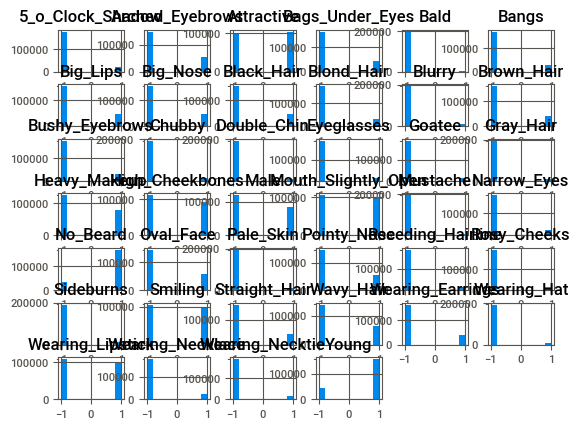

In [25]:
list_attr_celeba.hist()

## 4. SHAP

In [26]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )
not_found_ids = []

for i in not_found:
    not_found_ids.append(i.name)

attr = pd.DataFrame([not_found_ids]).T
attr['Recognized'] = -1
 
attr = pd.merge(list_attr_celeba, attr, left_on='image_id', right_on=0, how='left').drop(columns=0)
attr.iloc[:,-1].replace(np.nan, 1, inplace=True)
attr['Recognized'] = attr['Recognized'].astype('int64')

# attr.replace(-1, 0, inplace=True)

attr.head(5).T

# Count the number of 1's for each attribute
attr.iloc[:,1:].sum(axis=0).sort_values(ascending=True)

Bald                  -193505
Mustache              -185765
Gray_Hair             -185601
Pale_Skin             -185197
Double_Chin           -183681
Wearing_Hat           -182963
Blurry                -181975
Sideburns             -179701
Chubby                -179273
Goatee                -177167
Eyeglasses            -176213
Rosy_Cheeks           -175969
Wearing_Necktie       -173135
Receding_Hairline     -170273
5_o_Clock_Shadow      -157567
Narrow_Eyes           -155941
Wearing_Necklace      -152773
Bushy_Eyebrows        -144993
Blond_Hair            -142633
Bangs                 -141181
Wearing_Earrings      -126047
Bags_Under_Eyes       -119707
Brown_Hair            -119455
Straight_Hair         -118155
Big_Nose              -107567
Black_Hair            -105655
Big_Lips              -105029
Arched_Eyebrows        -94419
Pointy_Nose            -90179
Oval_Face              -87465
Wavy_Hair              -73111
Heavy_Makeup           -45819
Male                   -33731
High_Cheek

In [27]:


# IDEA FROM CHAT

# import face_recognition
import shap
# # import numpy as np
# # import pandas as pd
# # from sklearn.ensemble import RandomForestClassifier

# # # Load the image file
# # image = face_recognition.load_image_file("path/to/image.jpg")

# # # Create a face recognition model
# # model = face_recognition.api.face_encodings(image)

# # # Load the physical attributes dataset
# # df = pd.read_csv("path/to/physical_attributes.csv")

# # Train a random forest classifier to predict face recognition from physical attributes
# X = attr.drop(columns=["image_id", "Recognized"]).values
# y = df["Recognized"]
# clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X, y)

# # Convert the classifier to a scikit-learn compatible estimator
# class FaceRecognitionModel:
#     def predict(self, X):
#         model_output = face_recognition.api.face_distance(model, X)
#         predicted_labels = clf.predict_proba(X)[:, 1]
#         return predicted_labels

# # Initialize the SHAP explainer with the face recognition model
# explainer = shap.Explainer(FaceRecognitionModel())

# # Calculate the SHAP values for the physical attributes
# shap_values = explainer(X)

[Step 2/3] Processing Pairwise Features      |▉         | [ 10%]   01:29 -> (13:45 left)
/Users/thomas/.pyenv/versions/3.11.1/envs/fairness/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/thomas/.pyenv/versions/3.11.1/envs/fairness/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-bac

In [28]:
for i in attr.iloc[:3,:].values:
    print(type(i))
    print(i[0])

<class 'numpy.ndarray'>
000001.jpg
<class 'numpy.ndarray'>
000002.jpg
<class 'numpy.ndarray'>
000003.jpg


In [29]:
from pathlib import Path
import face_recognition

class FaceRecognitionModel:
    def predict(self, X):

        y_pred = []

        for i in X:

            # Image name from features
            image_name = i[0]

            # Load the image file
            path = Path('../data/celeb_dataset/img_align_celeba/img_align_celeba')
            image_path = path / image_name
            image = face_recognition.load_image_file(image_path)

            # Try to recognize the face
            face_loc = face_recognition.face_locations(image)
            
            if len(face_loc) == 0:
                y_pred.append(0)
            else:
                y_pred.append(1)
        
        return np.array(y_pred)

model = FaceRecognitionModel()
model.predict(attr.iloc[:3,:].values)

array([1, 1, 0])

**SHAP values**

We tried with SHAP values to see if it could be used for calculating the influence of the latent features. 

Since SHAP works by masking features and in that way calculate their influence, this didnt work. 

In [30]:
attr

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Recognized
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,-1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,-1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,1,1,-1,-1,-1,-1,-1,-1,1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,1,-1,1,1,-1,1,-1,-1,1,1


In [31]:
import shap

# X is all the attributes except the last column (Recognized)
X = attr.iloc[:, 1:-1].values
y = attr.iloc[:, -1].values
y_true = [1]*len(X)

# Initialize the SHAP explainer with the face recognition model
# explainer = shap.KernelExplainer(model.predict, X)

# Calculate the SHAP values for the physical attributes
# shap_v = explainer.shap_values(X)

In [32]:
type(y[1])

numpy.int64

**LIME (Local Interpretable Model-Agnostic Explanations)**

Or something like it. 

We want to try to create a DT classifier to find latent variables to the predicted output. In that way to check if there are any latent variables that might contribute to recognizing a face or not.

1. Without balancing data

In [33]:
# In order to investigate the influnce of different latent features on the face recognition model,
# we will try to train a decision tree classifier on the latent features and the output of the face recognition model.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_state = 42

X = attr.iloc[:, 1:-1].values
y = attr.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

clf = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
y_dt_pred = clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_dt_pred))

Accuracy score:  0.953923988153998


2. Balancing data, so there are an equal amount of recognized / not recognized faces in the training data

In [34]:
def balance_data(df):
    label1 = df[df['Recognized'] == -1].values
    label2 = df[df['Recognized'] == 1].iloc[:label1.shape[0], :].values

    balanced = np.concatenate((label1, label2), axis=0)

    X = balanced[:, 1:-1].astype('int64')
    y = balanced[:, -1].astype('int64')

    return X, y

# def balance_data(X, y):
#     label1 = np.concatenate((X[y == 0], y[y == 0].reshape(-1, 1)), axis=1)
#     label2 = np.concatenate((X[y == 1], y[y == 1].reshape(-1, 1)), axis=1)[:label1.shape[0]]

#     balanced = np.concatenate((label1, label2), axis=0)

#     X_balanced = balanced[:, :-1].astype('int64')
#     y_balanced = balanced[:, -1].astype('int64')

#     return X_balanced, y_balanced

X_balanced, y_balanced = balance_data(attr)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=random_state, stratify=y_balanced)

clf = DecisionTreeClassifier(random_state=random_state,
                             max_depth = 15,
                             min_samples_split = 5,
                             min_samples_leaf = 20,
                             ).fit(X_train, y_train)
y_dt_pred = clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_dt_pred))

Accuracy score:  0.7927807486631016


Trying to use gridsearch to find better params for the DT classifier.

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10, 20],
    'max_features': [None, 'sqrt', 5, 10]
}

# Create the decision tree classifier
dtc = DecisionTreeClassifier(random_state=random_state)

# Create the grid search object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)


# Using these params to train the model
clf = DecisionTreeClassifier(random_state=random_state,
                             **grid_search.best_params_
                             ).fit(X_train, y_train)


y_dt_pred = clf.predict(X_test)

# Print accuracy of both train and test set:
print("Accuracy score on train: ", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy score on test: ", accuracy_score(y_test, y_dt_pred))



print("acc with after gridCV params", accuracy_score(y_test, y_dt_pred))
print("acc with new params", accuracy_score(y_test, y_dt_pred))


Best parameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 5}
Accuracy score on train:  0.8094495208379764
Accuracy score on test:  0.7927807486631016


In [121]:
# Use the decision tree classifier to check the importance of each latent feature
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_name = attr.columns[1:-1]
dt_feat_import = pd.DataFrame({'Feature': feat_name[indices], 'Importance': importances[indices]})

# Set a threshold for the maximum length of a feature name
max_feat_name_length = 15

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    feat_name_formatted = feat_name[f] + "\t" if len(feat_name[f]) < max_feat_name_length else feat_name[f]
    print("%d. feat. %d \t%s \t(%f)" % (f + 1, indices[f], feat_name_formatted, importances[indices[f]]))


Feature ranking:
1. feat. 19 	5_o_Clock_Shadow 	(0.349538)
2. feat. 2 	Arched_Eyebrows 	(0.148982)
3. feat. 35 	Attractive	 	(0.093751)
4. feat. 1 	Bags_Under_Eyes 	(0.076115)
5. feat. 0 	Bald	 	(0.037912)
6. feat. 38 	Bangs	 	(0.037467)
7. feat. 12 	Big_Lips	 	(0.032764)
8. feat. 36 	Big_Nose	 	(0.026245)
9. feat. 25 	Black_Hair	 	(0.025025)
10. feat. 31 	Blond_Hair	 	(0.018960)
11. feat. 5 	Blurry	 	(0.018637)
12. feat. 3 	Brown_Hair	 	(0.018212)
13. feat. 18 	Bushy_Eyebrows	 	(0.013050)
14. feat. 15 	Chubby	 	(0.012238)
15. feat. 10 	Double_Chin	 	(0.011779)
16. feat. 32 	Eyeglasses	 	(0.009687)
17. feat. 14 	Goatee	 	(0.008333)
18. feat. 20 	Gray_Hair	 	(0.008096)
19. feat. 7 	Heavy_Makeup	 	(0.006940)
20. feat. 6 	High_Cheekbones 	(0.006079)
21. feat. 30 	Male	 	(0.006007)
22. feat. 8 	Mouth_Slightly_Open 	(0.005821)
23. feat. 21 	Mustache	 	(0.005650)
24. feat. 33 	Narrow_Eyes	 	(0.003870)
25. feat. 39 	No_Beard	 	(0.003503)
26. feat. 27 	Oval_Face	 	(0.003396)
27. feat. 23 	Pale

In [122]:
dt_feat_import

,Feature,Importance
0,High_Cheekbones,0.349538
1,Attractive,0.148982
2,Wearing_Hat,0.093751
3,Arched_Eyebrows,0.076115
4,5_o_Clock_Shadow,0.037912
5,Wearing_Necktie,0.037467
6,Bushy_Eyebrows,0.032764
7,Wearing_Lipstick,0.026245
8,Oval_Face,0.025025
9,Smiling,0.018960


In [37]:
# visualize the decision tree with dtreeviz.trees
# from dtreeviz.trees import dtreeviz

# before, on mac:
# brew install graphviz
# test in cmd: dot -V

create_dtree = False

if create_dtree:
    import dtreeviz
    import graphviz.backend as be

    viz = dtreeviz.model(clf,
                    X_train,
                    y_train,
                    # target_name='Recognized',
                    # feature_names=feat_name,
                    # class_names=['Not recognized', 'Recognized'],
                    # orientation='TD',
                    # fancy=True,
                    # X=None,
                    # label_fontsize=12,
                    # ticks_fontsize=8,
                    )

    viz.view()

## Fairness metrics

**Equalized odds**

True positive / False positive

So in this case, how many many cases did it predict a face of how many faces there actually were?

For each protected group.

In [38]:
attr.head(2).T

,0,1
image_id,000001.jpg,000002.jpg
5_o_Clock_Shadow,-1,-1
Arched_Eyebrows,1,-1
Attractive,1,-1
Bags_Under_Eyes,-1,1
Bald,-1,-1
Bangs,-1,-1
Big_Lips,-1,-1
Big_Nose,-1,1
Black_Hair,-1,-1


## Readin downsized dataset and darker/lighter skin color filters

attr has all images. We want to downsize. 

In [39]:
# We downsized the images. We are loading the downsized images here.

try:
    data = pd.read_csv('../data/downsized_attributes_incl_darker_lighter.csv').rename(columns={'found': 'Recognized'})
    print("Read in downsized_attributes_incl_darker_lighter.csv")

except:
    print("Could not find downsized_attributes_incl_darker_lighter.csv. \nTrying downsized_attributes.csv.")
    data = pd.read_csv('../data/downsized_attributes.csv').rename(columns={'found': 'Recognized'})

    print("Starting to recognize the images in the darker and lighter filtered images. This will take a while.")
    
    data['Recognized_lighter_skin'] = 1
    data['Recognized_darker_skin'] = 1

    data.shape, data.columns


    from pathlib import Path
    from tqdm import tqdm 
    import sys

    run_cell == False

    if run_cell == False:
        sys.exit()

    not_found_dict = {}

    # for folder in ['img_align_celeba', 'darker_skin', 'lighter_skin']:
    for folder in ['darker_skin', 'lighter_skin']:

        path = Path(f'../data/celeb_dataset/img_align_celeba/{folder}')
        image_paths = [path / img_id for img_id in data.image_id]

        not_found = []
        not_found_ids = []

        with tqdm(total=len(image_paths), desc='Processing Images') as pbar:
            for img_path in image_paths:
                image = face_recognition.load_image_file(img_path)
                face_locations = face_recognition.face_locations(image)
                if len(face_locations) == 0:
                    not_found.append(img_path)
                    not_found_ids.append(img_path.name)
                
                # Update the progress bar
                pbar.update(1)

        not_found_dict[folder] = not_found

        for image_id in not_found_dict[folder]:
            data.loc[data['image_id'] == image_id.name, 'Recognized_' + folder] = -1

        data.to_csv('../data/downsized_attributes_incl_darker_lighter.csv', index=False)
        print("Saved downsized_attributes_incl_darker_lighter.csv")

Read in downsized_attributes_incl_darker_lighter.csv


In [40]:
print(data.Recognized.value_counts())
print(data.Recognized_lighter_skin.value_counts())
print(data.Recognized_darker_skin.value_counts())


 1    40000
-1     5609
Name: Recognized, dtype: int64
 1    39806
-1     5803
Name: Recognized_lighter_skin, dtype: int64
 1    39579
-1     6030
Name: Recognized_darker_skin, dtype: int64


## Equilized odds

In [50]:
def equalized_odds(protected_feature, data=data, column='Recognized'):
    """
    Calculate the equalized odds for a given protected feature.
    
    Input protected_features: The columns name protected feature to calculate the equalized odds for.
    Returns the equalized odds for the given protected feature.
    """

    tpr = data.loc[(data[column] == 1) & (data[protected_feature] == 1)].shape[0]
    fpr = data.loc[(data[column] == -1) & (data[protected_feature] == 1)].shape[0]

    feature_1 = tpr/(tpr + fpr)

    tpr = data.loc[(data[column] == 1) & (data[protected_feature] == -1)].shape[0]
    fpr = data.loc[(data[column] == -1) & (data[protected_feature] == -1)].shape[0]

    feature_0 = tpr/(tpr + fpr)

    return feature_1, feature_0

# print("Equalized odds for features:")
# for feature in ['Attractive', 'Chubby', 'Male', 'Pale_Skin']:
#     eq_odds = np.round(equalized_odds(feature), 3)
#     print(f"\n{feature} = True:  {eq_odds[0]}")
#     print(f"{feature} = False: {eq_odds[1]}")

# Now we are saving the equalized odds for each feature in a dataframe for later use
odds_df = pd.DataFrame(columns={'Feature': str, 'normal': float, 'darker_skin': float, 'lighter_skin': float})

features = ['Attractive', 'Chubby', 'Male', 'Pale_Skin']
features = list(data.columns)[1:-3]

for feature in features:

    eq_odds = np.round(equalized_odds(feature, data=data, column='Recognized'), 3)
    eq_odds_dark = np.round(equalized_odds(feature, data=data, column='Recognized_darker_skin'), 3)
    eq_odds_light = np.round(equalized_odds(feature, data=data, column='Recognized_lighter_skin'), 3)

    odds_df.loc[len(odds_df)] = [feature + ", True", eq_odds[0], eq_odds_dark[0], eq_odds_light[0]]
    odds_df.loc[len(odds_df)] = [feature + ", False", eq_odds[1], eq_odds_dark[1], eq_odds_light[1]]

# odds_df['diff. from org. dataset'] = odds_df['celeba-dataset'] - odds_df['celeba-color-filter']

odds_df

,Feature,normal,darker_skin,lighter_skin
0,"5_o_Clock_Shadow, True",0.935,0.928,0.931
1,"5_o_Clock_Shadow, False",0.870,0.861,0.866
2,"Arched_Eyebrows, True",0.986,0.984,0.985
3,"Arched_Eyebrows, False",0.842,0.831,0.837
4,"Attractive, True",0.958,0.954,0.956
...,...,...,...,...
75,"Wearing_Necklace, False",0.869,0.859,0.865
76,"Wearing_Necktie, True",0.950,0.947,0.948
77,"Wearing_Necktie, False",0.872,0.862,0.867
78,"Young, True",0.888,0.879,0.884


In [51]:
print(odds_df.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                     Feature &  normal &  darker\_skin &  lighter\_skin \\
\midrule
0  &      5\_o\_Clock\_Shadow, True &   0.935 &        0.928 &         0.931 \\
1  &     5\_o\_Clock\_Shadow, False &   0.870 &        0.861 &         0.866 \\
2  &       Arched\_Eyebrows, True &   0.986 &        0.984 &         0.985 \\
3  &      Arched\_Eyebrows, False &   0.842 &        0.831 &         0.837 \\
4  &            Attractive, True &   0.958 &        0.954 &         0.956 \\
5  &           Attractive, False &   0.803 &        0.789 &         0.797 \\
6  &       Bags\_Under\_Eyes, True &   0.939 &        0.931 &         0.936 \\
7  &      Bags\_Under\_Eyes, False &   0.862 &        0.853 &         0.858 \\
8  &                  Bald, True &   0.900 &        0.888 &         0.897 \\
9  &                 Bald, False &   0.877 &        0.867 &         0.872 \\
10 &                 Bangs, True &   0.853 &        0.839 &         0.846 \\
11 &                B

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [104]:
# # heatmap of equalized odds
# odds_plot = odds_df.set_index('Feature')
# # odds_df = odds_df.drop(columns=['diff. from org. dataset'])
# odds_plot = odds_plot.T

# plt.figure(figsize=(60, 3))
# plt.rcParams['font.size'] = 11
# plt.tick_params(labelsize=18)
# sns.heatmap(odds_plot, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 12})
# plt.title('Equalized Odds for different features')
# plt.show()


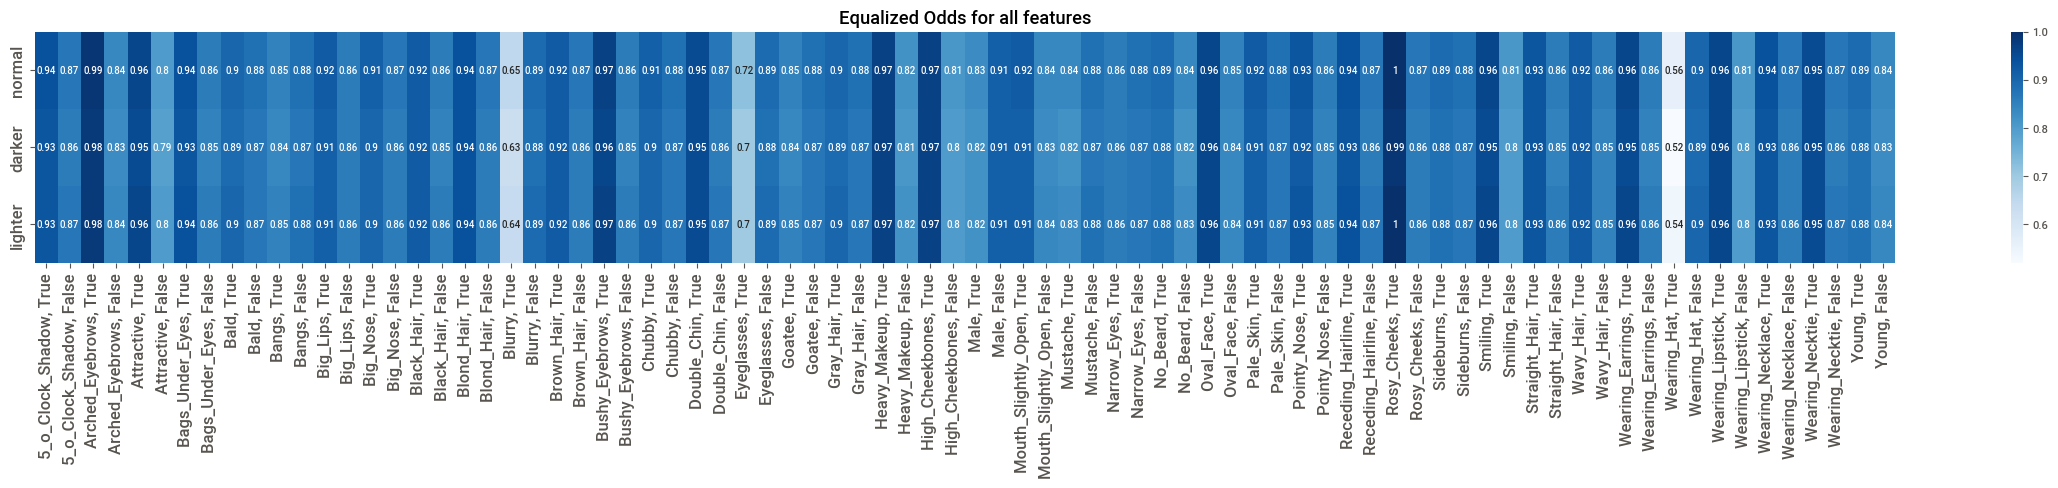

In [115]:
# heatmap of equalized odds
odds_plot = odds_df.set_index('Feature')
# odds_df = odds_df.drop(columns=['diff. from org. dataset'])
odds_plot = odds_plot.rename(columns={'normal': 'normal', 'darker_skin': 'darker', 'lighter_skin': 'lighter'})

# round down to 2 decimals
odds_plot = odds_plot.round(2)

odds_plot = odds_plot.T


plt.figure(figsize=(30, 3))
sns.heatmap(odds_plot, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 7})
# set label size
plt.tick_params(labelsize=12)
# set text size of table values
# plt.text(0, 0, "", ha="center", va="center", fontsize=1)
# plt.rcParams['font.size'] = 8

plt.xlabel('', fontsize=12)


plt.title('Equalized Odds for all features')
plt.savefig('../figures/heatmap_odds.png', dpi=300, bbox_inches='tight')
plt.show()

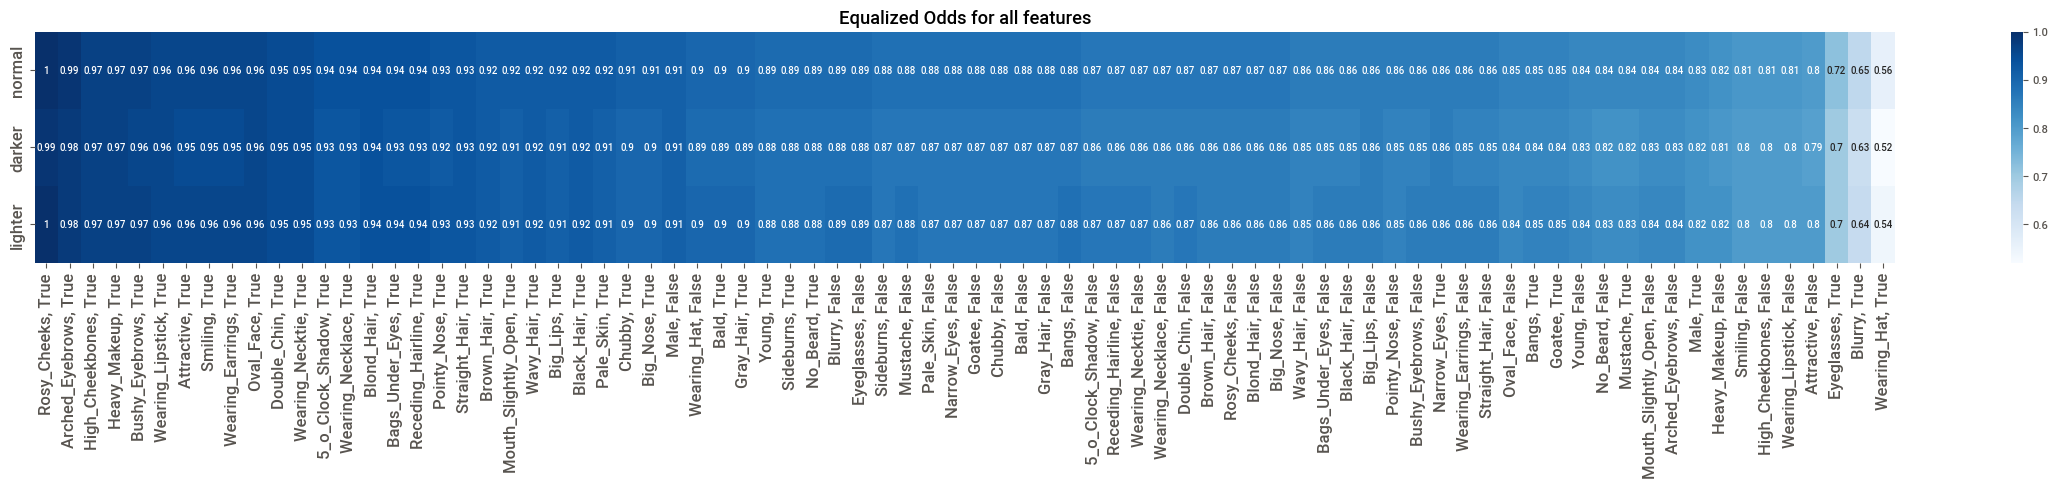

In [116]:
# heatmap of equalized odds
odds_plot = odds_df.set_index('Feature')
# odds_df = odds_df.drop(columns=['diff. from org. dataset'])
odds_plot = odds_plot.rename(columns={'normal': 'normal', 'darker_skin': 'darker', 'lighter_skin': 'lighter'})

# round down to 2 decimals
odds_plot = odds_plot.round(2)

# sort the rows by the "normal" column
odds_plot = odds_plot.sort_values(by=['normal'], ascending=False)


odds_plot = odds_plot.T





plt.figure(figsize=(30, 3))
sns.heatmap(odds_plot, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 7})
# set label size
plt.tick_params(labelsize=12)
# set text size of table values
# plt.text(0, 0, "", ha="center", va="center", fontsize=1)
# plt.rcParams['font.size'] = 8

plt.xlabel('', fontsize=12)


plt.title('Equalized Odds for all features')
plt.savefig('../figures/heatmap_odds_sorted.png', dpi=300, bbox_inches='tight')
plt.show()

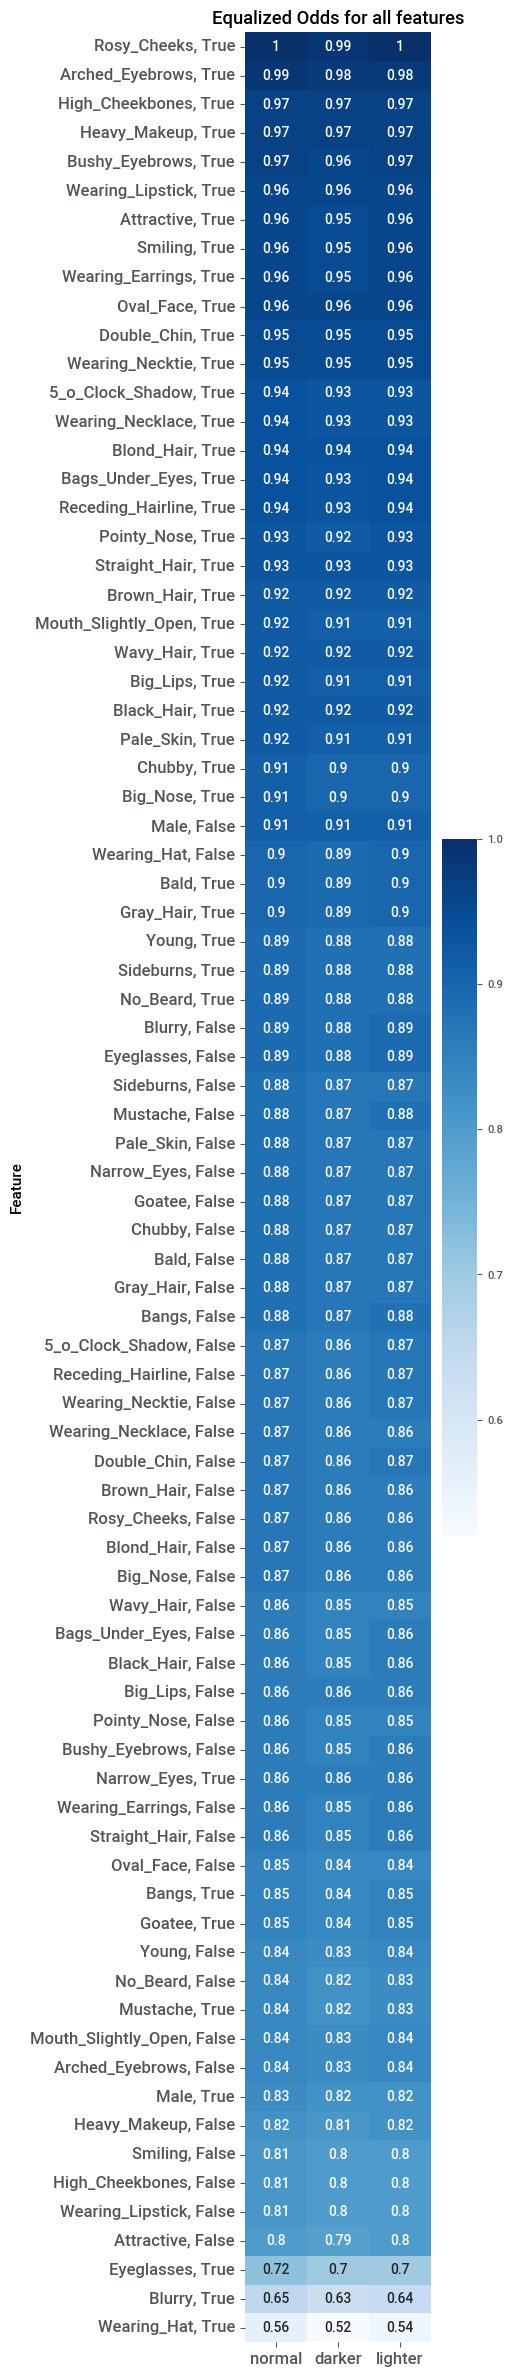

In [119]:
# heatmap of equalized odds
odds_plot = odds_df.set_index('Feature')
# odds_df = odds_df.drop(columns=['diff. from org. dataset'])
odds_plot = odds_plot.rename(columns={'normal': 'normal', 'darker_skin': 'darker', 'lighter_skin': 'lighter'})

# round down to 2 decimals
odds_plot = odds_plot.round(2)

# sort the rows by the "normal" column
odds_plot = odds_plot.sort_values(by=['normal'], ascending=False)


# odds_plot = odds_plot.T





plt.figure(figsize=(3, 30))
sns.heatmap(odds_plot, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 10})
# set label size
plt.tick_params(labelsize=12)
# set text size of table values
# plt.text(0, 0, "", ha="center", va="center", fontsize=1)
# plt.rcParams['font.size'] = 8

plt.xlabel('', fontsize=12)


plt.title('Equalized Odds for all features')
plt.savefig('../figures/heatmap_odds_sorted_vertical.png', dpi=300, bbox_inches='tight')
plt.show()